# Particle Swarm Optimization (PSO)

In [1]:
import random
from typing import NamedTuple

import matplotlib.pyplot as plt


In [2]:
weight = 0.5
c1 = 0.8
c2 = 0.9

In [3]:
iterations = 50
particles = 30
error = 1e-6

In [4]:
class Position(NamedTuple):
    x: float
    y: float


class Velocity(NamedTuple):
    x: float = 0.0
    y: float = 0.0

In [5]:
class Particle:
    def __init__(self, position: Position | None = None, velocity: Velocity | None = None):
        self.position = position or Position(
            x=(-1) ** random.randint(0, 1) * random.random() * 1000,
            y=(-1) ** random.randint(0, 1) * random.random() * 1000
        )
        self.velocity = velocity or Velocity(x=0.0, y=0.0)
        self.best_position = self.position
        self.best_value = float('inf')
        self.best_error = self.error()
    
    def update_position(self):
        self.position = Position(
            x=self.position.x + self.velocity.x,
            y=self.position.y + self.velocity.y
        )
    
    def error(self):
        return (self.position.x ** 2 + self.position.y ** 2) ** 0.5
    
    def __repr__(self):
        return f'<Particle {self.position}>'

In [6]:
class Space:
    def __init__(self, particles: list[Particle], target: int, error: float):
        self.particles = particles
        self.target = target
        self.error = error
        self.best_value = float('inf')
        self.best_position = Position(random.random() * 50, random.random() * 50)
        self.best_particle = None
    
    def __repr__(self):
        return f'<Space {self.best_position}>'
    
    def fitness(self, particle: Particle):
        return particle.position.x ** 2 + particle.position.y ** 2 + 1
    
    def update_pbest(self):
        for particle in self.particles:
            if self.fitness(particle) < particle.best_value:
                particle.best_value = self.fitness(particle)
                particle.best_position = particle.position
                particle.best_error = particle.error()
    
    def update_gbest(self):
        for particle in self.particles:
            if self.fitness(particle) < self.best_value:
                self.best_value = self.fitness(particle)
                self.best_position = particle.position
                self.best_particle = particle
    
    def update_particles(self):
        for particle in self.particles:
            inertia_x = weight * particle.velocity.x
            inertia_y = weight * particle.velocity.y

            self_confidence_x = c1 * random.random() * (particle.best_position.x - particle.position.x)
            self_confidence_y = c1 * random.random() * (particle.best_position.y - particle.position.y)

            global_confidence_x = c2 * random.random() * (self.best_position.x - particle.position.x)
            global_confidence_y = c2 * random.random() * (self.best_position.y - particle.position.y)

            particle.velocity = Velocity(
                x=inertia_x + self_confidence_x + global_confidence_x,
                y=inertia_y + self_confidence_y + global_confidence_y
            )
            particle.update_position()
    
    def plot(self, iteration: int):
        print(f'Iteration: {iteration}')
        print(f'Best value: {self.best_value}')
        print(f'Best position: {self.best_position}')

        for particle in self.particles:
            plt.plot(particle.position.x, particle.position.y, c='red', marker='o')
        
        plt.plot(self.best_position.x, self.best_position.y, c='green', marker='o')
        plt.show()
    

Iteration: 0
Best value: 49495.68034288065
Best position: Position(x=-175.04532811414796, y=137.30918923470102)


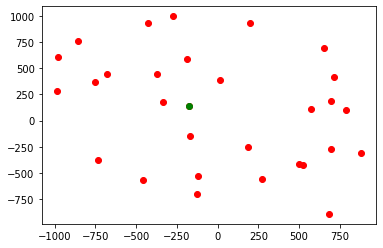

Iteration: 1
Best value: 11807.48756208043
Best position: Position(x=97.9946429683556, y=46.94185245156973)


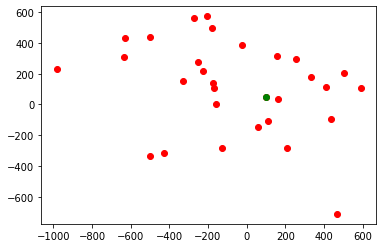

Iteration: 2
Best value: 2993.006194877176
Best position: Position(x=-54.52722144080633, y=-4.334549206370411)


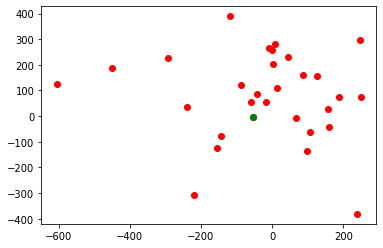

Iteration: 3
Best value: 180.46589741820338
Best position: Position(x=-11.569610848168892, y=-6.753517767810791)


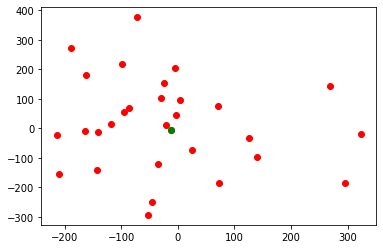

Iteration: 4
Best value: 180.46589741820338
Best position: Position(x=-11.569610848168892, y=-6.753517767810791)


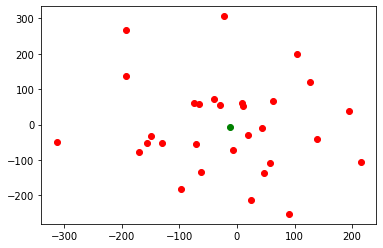

Iteration: 5
Best value: 42.970185394486656
Best position: Position(x=-6.340542332702441, y=1.329551925159354)


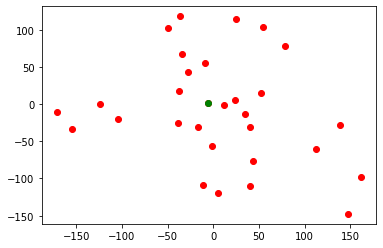

Iteration: 6
Best value: 42.970185394486656
Best position: Position(x=-6.340542332702441, y=1.329551925159354)


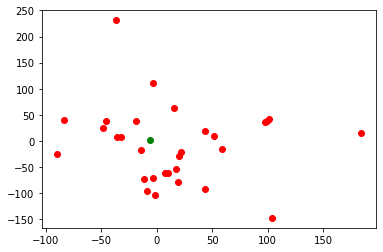

Iteration: 7
Best value: 42.970185394486656
Best position: Position(x=-6.340542332702441, y=1.329551925159354)


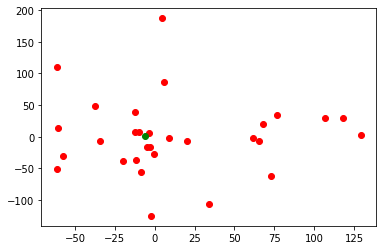

Iteration: 8
Best value: 6.101350061915157
Best position: Position(x=0.4583228864040707, y=-2.2116261423923795)


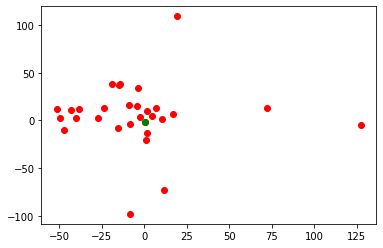

Iteration: 9
Best value: 4.898751624115499
Best position: Position(x=-1.5877120204214017, y=1.1738492937020872)


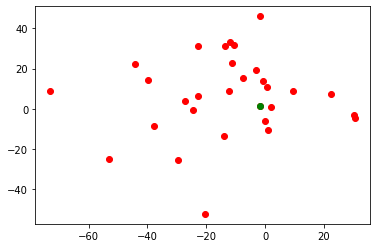

Iteration: 10
Best value: 1.349131790171852
Best position: Position(x=-0.4590323730814627, y=0.3720498227859448)


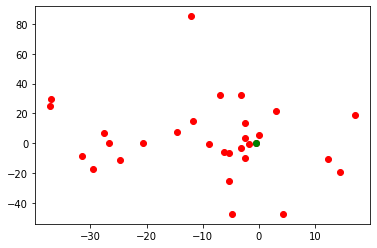

Iteration: 11
Best value: 1.349131790171852
Best position: Position(x=-0.4590323730814627, y=0.3720498227859448)


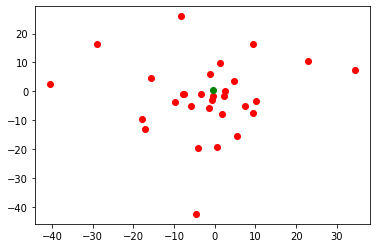

Iteration: 12
Best value: 1.349131790171852
Best position: Position(x=-0.4590323730814627, y=0.3720498227859448)


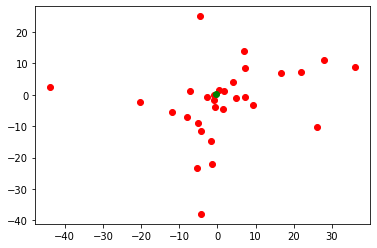

Iteration: 13
Best value: 1.349131790171852
Best position: Position(x=-0.4590323730814627, y=0.3720498227859448)


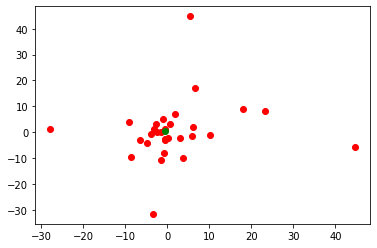

Iteration: 14
Best value: 1.349131790171852
Best position: Position(x=-0.4590323730814627, y=0.3720498227859448)


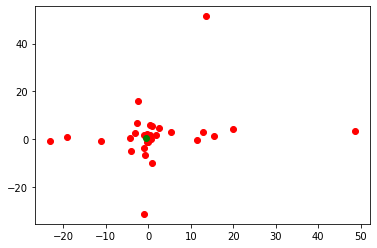

Iteration: 15
Best value: 1.1366125379512055
Best position: Position(x=-0.3621645957851072, y=0.07381966886281321)


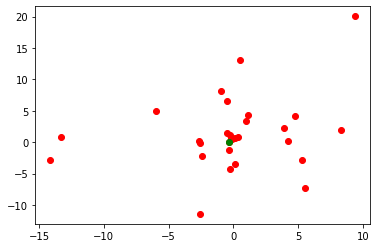

Iteration: 16
Best value: 1.0235545108285486
Best position: Position(x=-0.037434820046671896, y=0.14883932637788255)


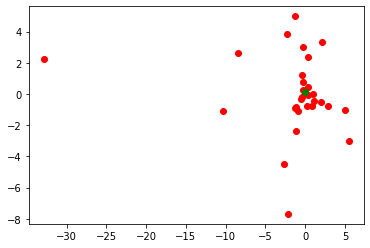

Iteration: 17
Best value: 1.0235545108285486
Best position: Position(x=-0.037434820046671896, y=0.14883932637788255)


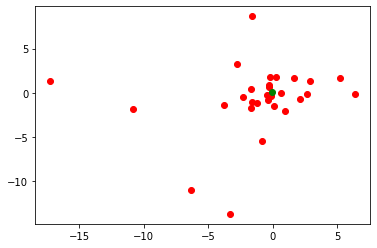

Iteration: 18
Best value: 1.0235545108285486
Best position: Position(x=-0.037434820046671896, y=0.14883932637788255)


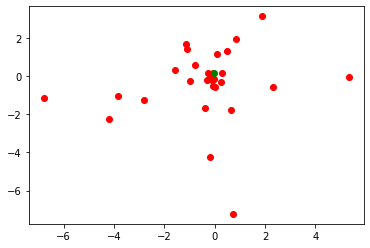

Iteration: 19
Best value: 1.0074749962988072
Best position: Position(x=-0.03913965333271277, y=0.07709139923365244)


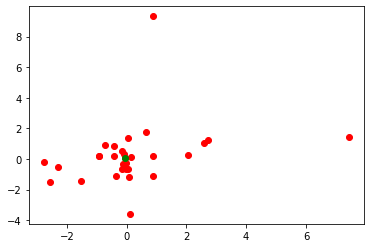

Iteration: 20
Best value: 1.0074749962988072
Best position: Position(x=-0.03913965333271277, y=0.07709139923365244)


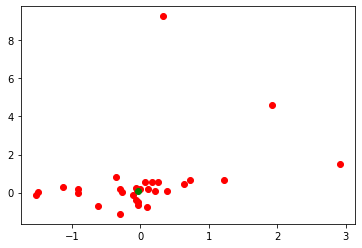

Iteration: 21
Best value: 1.0004339415130556
Best position: Position(x=-0.007551503390615305, y=0.019414332581809746)


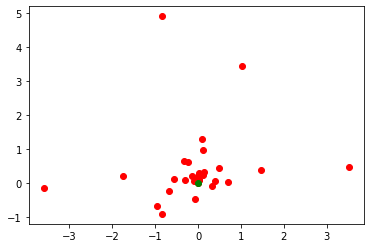

Iteration: 22
Best value: 1.0004339415130556
Best position: Position(x=-0.007551503390615305, y=0.019414332581809746)


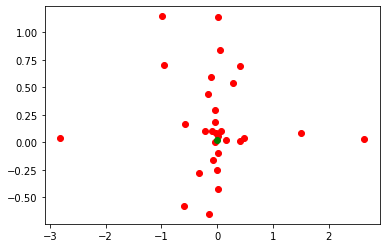

Iteration: 23
Best value: 1.0004339415130556
Best position: Position(x=-0.007551503390615305, y=0.019414332581809746)


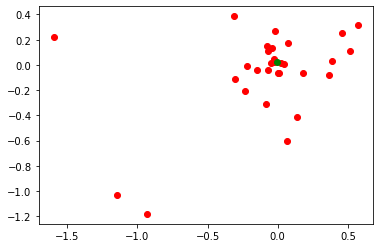

Iteration: 24
Best value: 1.000293425841954
Best position: Position(x=-0.0156467185320816, y=-0.006971803291240933)


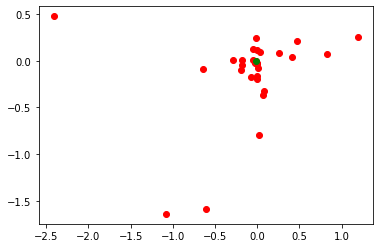

Iteration: 25
Best value: 1.0000136034064644
Best position: Position(x=0.0012641527038544098, y=-0.003464870041679318)


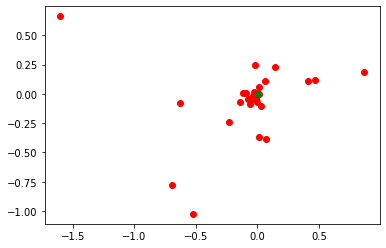

Iteration: 26
Best value: 1.0000136034064644
Best position: Position(x=0.0012641527038544098, y=-0.003464870041679318)


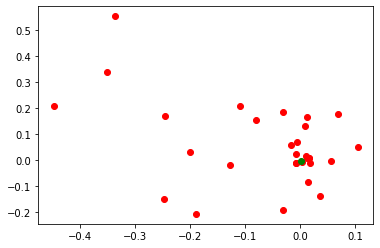

Iteration: 27
Best value: 1.0000136034064644
Best position: Position(x=0.0012641527038544098, y=-0.003464870041679318)


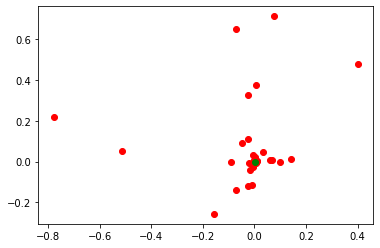

Iteration: 28
Best value: 1.0000136034064644
Best position: Position(x=0.0012641527038544098, y=-0.003464870041679318)


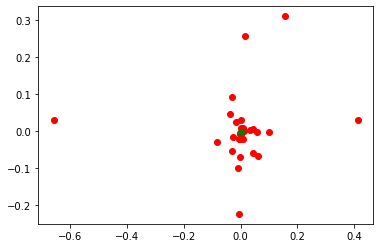

Iteration: 29
Best value: 1.0000136034064644
Best position: Position(x=0.0012641527038544098, y=-0.003464870041679318)


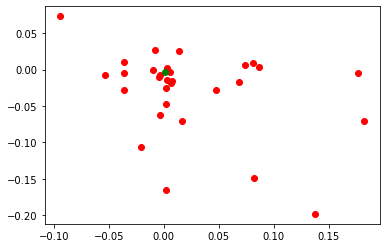

Iteration: 30
Best value: 1.0000031488322374
Best position: Position(x=-0.0010139019753634807, y=-0.001456308697256584)


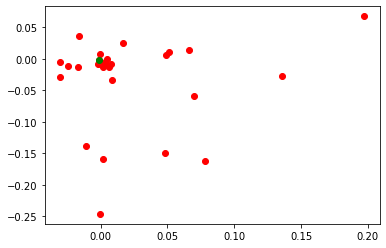

Iteration: 31
Best value: 1.0000010364420855
Best position: Position(x=-0.0009556549482118218, y=-0.0003509497191420772)


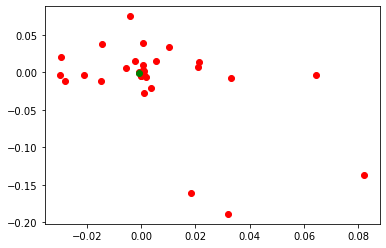

Iteration: 32
Best value: 1.0000010364420855
Best position: Position(x=-0.0009556549482118218, y=-0.0003509497191420772)


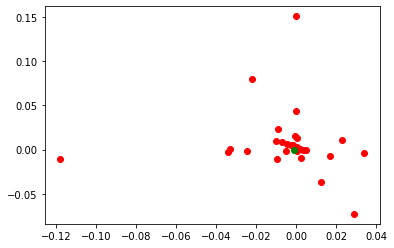

Iteration: 33
Best value: 1.0000010068215228
Best position: Position(x=-0.0002801475441675913, y=-0.0009635034386666717)


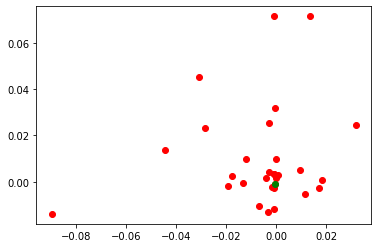

Iteration: 34
Best value: 1.0000001135038776
Best position: Position(x=-3.1078467639874825e-06, y=0.0003368890305403254)


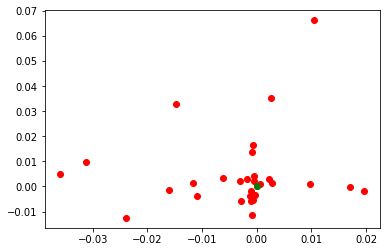

The best position is: Position(x=-3.1078467639874825e-06, y=0.0003368890305403254) in 34 iterations


In [7]:
search_space = Space(
    particles=[Particle() for _ in range(particles)],
    target=1,
    error=error
)

iteration = 0
while iteration < iterations:
    search_space.update_pbest()
    search_space.update_gbest()

    search_space.plot(iteration)

    if abs(search_space.best_value - search_space.target) < search_space.error:
        break

    search_space.update_particles()
    iteration += 1

print(f'The best position is: {search_space.best_position} in {iteration} iterations')